In [ ]:
# !pip install fbprophet

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

## 데이터 로드

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/씨디맨_stat.csv'
df = pd.read_csv(path, header=0)
print(df.shape)
print(df.head())

(368, 6)
   searchDate  dailyViewCount  ...  favorablePercent  activePercent
0  2020-02-14           23951  ...                 0             51
1  2020-02-15           24636  ...                 0             51
2  2020-02-16           25744  ...                 0             52
3  2020-02-17           26328  ...                 0             52
4  2020-02-18           25206  ...                 0             51

[5 rows x 6 columns]


## 불필요한 컬럼 삭제(단변량 예측)

In [ ]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [ ]:
# 데이터의 마지막 날짜와 그 다음 날짜를 저장
lastday = df['searchDate'][len(df)-1]
nextday = str(pd.date_range(lastday, periods=2)[1])[:10]
print("마지막 날짜 : {}, 예측 시작 날짜 : {}".format(lastday, nextday))

마지막 날짜 : 2021-02-16, 예측 시작 날짜 : 2021-02-17


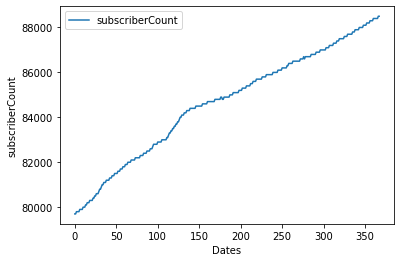

In [ ]:
df.plot()
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.show()

## 모델에 맞게 데이터 전처리

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']
# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
preday = 30

In [ ]:
fast_10day = str(pd.date_range(df['ds'][len(df)-preday], periods=preday)[0])[:10]

In [ ]:
y_true = df['y'][-preday:].values

# train set 마지막 preday일 날짜 예측 검증
last_10day = list()
for i in range(preday):
    last_10day.append(str(pd.date_range(fast_10day, periods=preday)[i])[:10])
last_10day = pd.DataFrame(last_10day, columns = ['ds'])
last_10day['ds']= pd.to_datetime(last_10day['ds'])

In [ ]:
from fbprophet import Prophet

# 모델 생성
model = Prophet()
# 모델 학습
model.fit(df)

forecast = model.predict(last_10day)
y_pred = forecast['yhat'].values

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


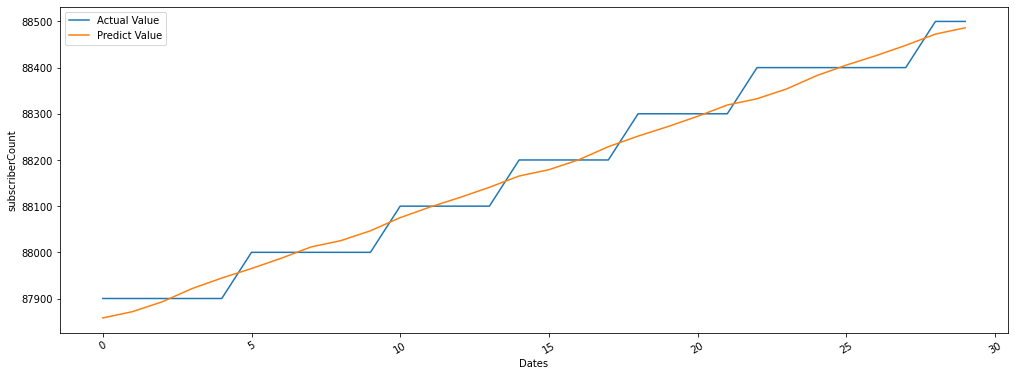

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(y_true, label="Actual Value")
plt.plot(y_pred, label="Predict Value")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('prophet - MAE 값 : %.3f' % mae)

prophet - MAE 값 : 26.600


## 예측할 일 수 입력

In [ ]:
# 예측할 날짜 일 수
predict_day = 9
# 예측 날짜 문자열 리스트 생성
pred_date = list()
for i in range(predict_day):
    pred_date.append(str(pd.date_range(nextday, periods=predict_day)[i])[:10])

# 날짜 리스트를 데이터 프레임 화
pred_date = pd.DataFrame(pred_date, columns = ['ds'])
# 문자열을 날짜 데이터 형식으로 변환
pred_date['ds']= pd.to_datetime(pred_date['ds'])

## 시각화

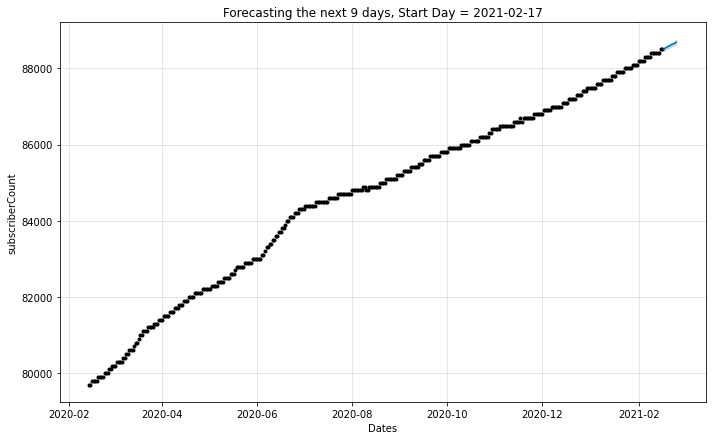

In [ ]:
# 미래 예측
forecast = model.predict(pred_date)
model.plot(forecast)
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {predict_day} days, Start Day = {nextday}")
plt.show()

In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df['ds'][len(df)-1], periods=2)[1])[:10]

step = 9
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

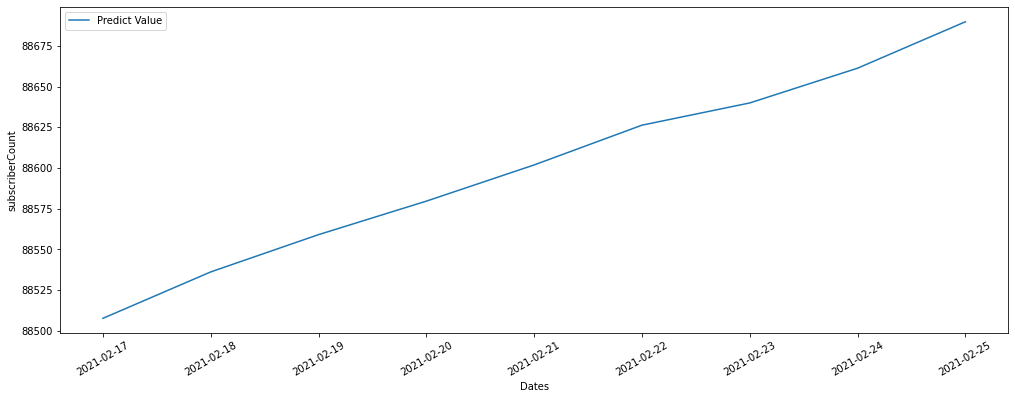

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(forecast['yhat'], label="Predict Value")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.legend()
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-17,88512.770019,88460.529450,88548.776981,88512.770019,88512.770019,-5.160280,-5.160280,-5.160280,-5.160280,-5.160280,-5.160280,0.0,0.0,0.0,88507.609739
1,2021-02-18,88534.723049,88490.084428,88582.536631,88534.723049,88534.723049,1.400430,1.400430,1.400430,1.400430,1.400430,1.400430,0.0,0.0,0.0,88536.123479
2,2021-02-19,88556.676079,88515.870414,88606.230268,88556.676079,88556.676079,2.339362,2.339362,2.339362,2.339362,2.339362,2.339362,0.0,0.0,0.0,88559.015441
3,2021-02-20,88578.629110,88528.098434,88623.362429,88577.286993,88580.721538,0.975503,0.975503,0.975503,0.975503,0.975503,0.975503,0.0,0.0,0.0,88579.604613
4,2021-02-21,88600.582140,88553.009446,88651.122245,88596.758700,88605.184273,1.263788,1.263788,1.263788,1.263788,1.263788,1.263788,0.0,0.0,0.0,88601.845928
5,2021-02-22,88622.535170,88582.355463,88680.854009,88614.034259,88632.791221,3.737911,3.737911,3.737911,3.737911,3.737911,3.737911,0.0,0.0,0.0,88626.273081
6,2021-02-23,88644.488200,88584.921366,88692.709591,88631.367182,88662.996291,-4.556714,-4.556714,-4.556714,-4.556714,-4.556714,-4.556714,0.0,0.0,0.0,88639.931486
7,2021-02-24,88666.441230,88606.448146,88718.702461,88646.488837,88691.407008,-5.160280,-5.160280,-5.160280,-5.160280,-5.160280,-5.160280,0.0,0.0,0.0,88661.280950
8,2021-02-25,88688.394261,88629.593750,88757.008386,88661.602710,88722.068976,1.400430,1.400430,1.400430,1.400430,1.400430,1.400430,0.0,0.0,0.0,88689.794691


In [ ]:
# yhat은 미래 예측 값, yhat_lower은 예측 하한값, yhat_upper은 예측 상한값
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds          yhat    yhat_lower    yhat_upper
0 2021-02-17  88507.609739  88460.529450  88548.776981
1 2021-02-18  88536.123479  88490.084428  88582.536631
2 2021-02-19  88559.015441  88515.870414  88606.230268
3 2021-02-20  88579.604613  88528.098434  88623.362429
4 2021-02-21  88601.845928  88553.009446  88651.122245
5 2021-02-22  88626.273081  88582.355463  88680.854009
6 2021-02-23  88639.931486  88584.921366  88692.709591
7 2021-02-24  88661.280950  88606.448146  88718.702461
8 2021-02-25  88689.794691  88629.593750  88757.008386


In [ ]:
arr = forecast['yhat']

In [ ]:
int(arr[0])

88507

In [ ]:
for i in arr :
  print(int(i))

88507
88536
88559
88579
88601
88626
88639
88661
88689
